## Batch 8 - exploring missing data
`

### Missing data per population after genotype correction and MAF filtering

In [1]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [2]:
cd scripts/PostStacksFiltering/

/mnt/hgfs/PCod-Compare-repo/scripts/PostStacksFiltering


In [3]:
!python FilterLoci_by_MissingValues_wFreqs.py \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci0.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci0_goodFreqs.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci0_BAD.txt \
../../stacks_b8_wgenome_r05/batch_8_MB_filteredMAF_filteredLoci0_badFreqs.txt \
0.0

processed 5694 loci
Number of loci removed: 5694


In [6]:
cd ../../stacks_b8_wgenome_r05/

/mnt/hgfs/PCod-Compare-repo/stacks_b8_wgenome_r05


In [16]:
# get the proportion missing data for each individual #
infile = open("batch_8_MB_filteredMAF_LociMissingData_bypop.txt", "r")

pop_list = infile.readline().strip().split()

missing_data_dict = {}

n_loci = 0
for line in infile:
    n_loci += 1
    data = line.strip().split("\t")[1].replace("]","").replace("[","").split(",")
    if n_loci == 1:
        for i in range(0,len(pop_list)):
            pop = pop_list[i]
            new_data = float(data[i])
            missing_data_dict[pop] = [new_data]
    else:
        for i in range(0,len(pop_list)):
            pop = pop_list[i]
            new_data = float(data[i])
            data_list = missing_data_dict[pop]
            data_list.append(new_data)
            missing_data_dict[pop] = data_list
infile.close()      


In [19]:
#check with file
missing_data_dict["UnimakPass03"][0:10]

[0.041666666666666664,
 0.08333333333333333,
 0.14583333333333334,
 0.0,
 0.041666666666666664,
 0.4583333333333333,
 0.041666666666666664,
 0.041666666666666664,
 0.08333333333333333,
 0.0625]

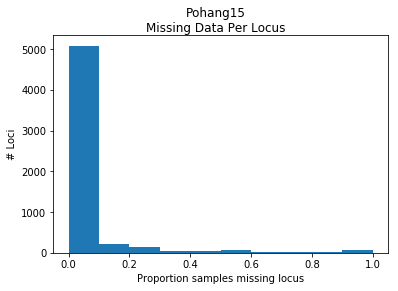

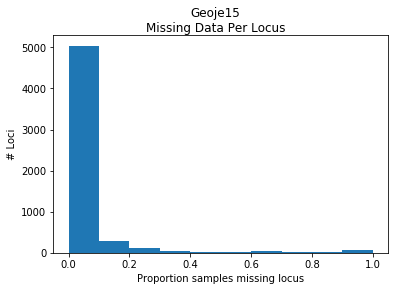

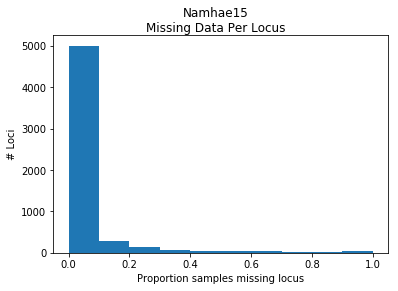

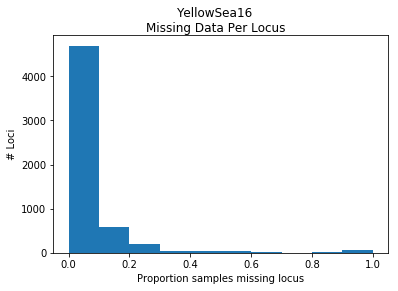

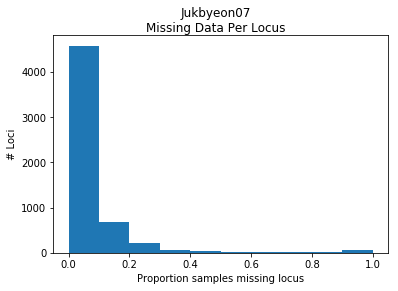

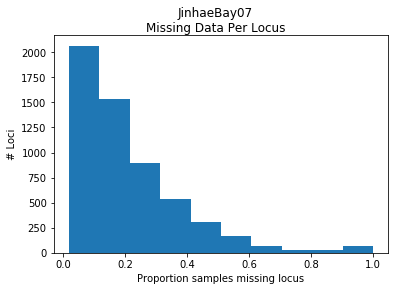

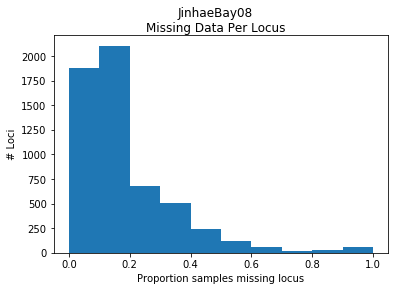

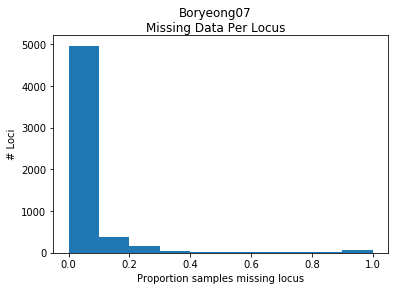

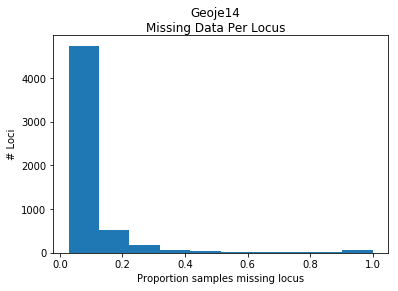

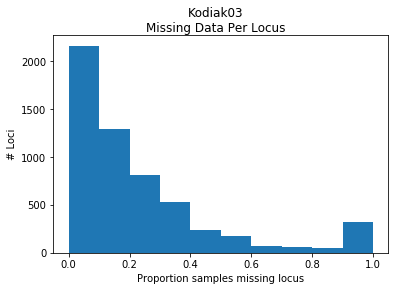

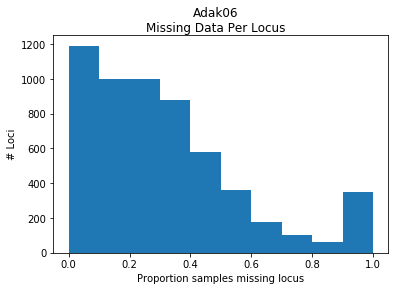

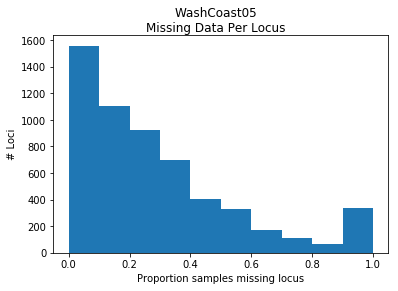

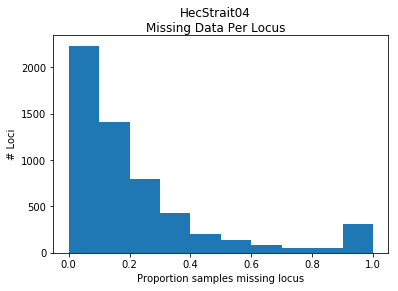

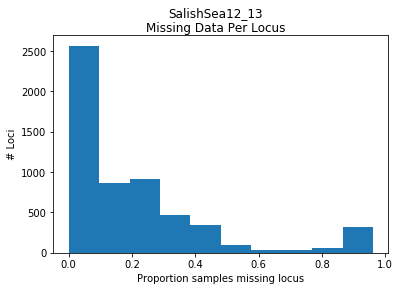

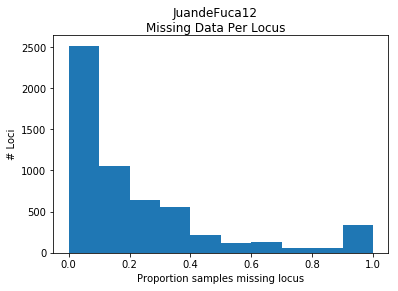

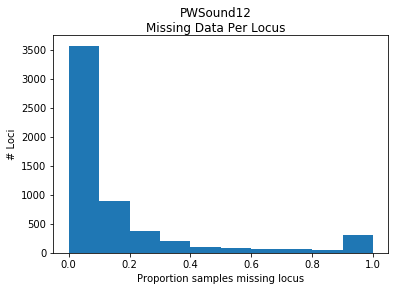

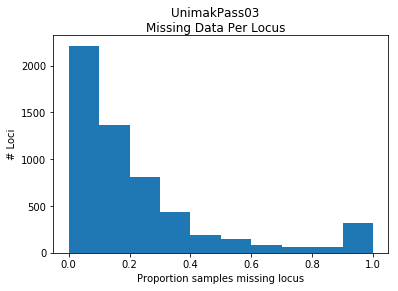

In [23]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(0,len(pop_list)):
    plt.hist(missing_data_dict[pop_list[i]])
    plt.suptitle(pop_list[i] + "\nMissing Data Per Locus")
    plt.xlabel("Proportion samples missing locus")
    plt.ylabel("# Loci")
    plt.show()

In [24]:
plt.close()

<br>
<br>
<br>

### Comparison of the number of loci per sample through stacks pipeline +

#### pstacks

I used the following command (borrowed from Eleni) in the terminal:

`grep --count --with-filename consensus *.tags.tsv > ../pstacks_loci_counts_b8.txt`

<br>
**Corrected genepop file**

It was actually easier to do this in excel. I counted the number of loci in each sample where the gentype `!= 0`, and then made the file format match Eleni's from the command above using "concatenate"

In [27]:
!head pstacks_loci_counts_b8.txt

AD06_001.tags.tsv:23948
AD06_002.tags.tsv:17531
AD06_003.tags.tsv:23285
AD06_004.tags.tsv:23355
AD06_005.tags.tsv:19933
AD06_006.tags.tsv:23402
AD06_007.tags.tsv:23294
AD06_008.tags.tsv:23661
AD06_009.tags.tsv:22003
AD06_010.tags.tsv:21510


In [29]:
!head genepop_loci_counts_b8.txt

**prep for plotting**

text file format for each must be "sample" "\t" "n_loci" "\t" "population"


In [1]:
korea = ["Boryeong07", "Geoje14", "Geoje15", "JinhaeBay07", "JinhaeBay08", "Jukbyeon07", "Namhae15", "Pohang15", "YellowSea16"]
alaska = ["Adak06", "HecStrait04", "JuandeFuca12", "Kodiak03", "PWSound12", "SalishSea12_13", "UnimakPass03", "WashCoast05"]

In [2]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [3]:
infile = open("genepop_loci_counts_b8.txt", "r")
popmap = open("scripts/PopMap_combo_b4.txt")

pop_dict = {}
for line in popmap:
    pop_dict[line.strip().split()[0]] = line.strip().split()[1]
popmap.close()

outfile = open("genepop_loci_counts_b8_forR.txt", "w")
outfile.write("sample\tn_loci\tpopulation\tgroup\n")

for line in infile:
    linelist = line.strip().split(":")
    sample = linelist[0].strip(".tags.tsv")
    population = pop_dict[sample]
    if population in korea:
        group = "Korea"
    else:
        group = "Alaska"
    outfile.write(sample + "\t" + linelist[1] + "\t" + population + "\t" + group + "\n")
infile.close()
outfile.close()

In [5]:
infile = open("pstacks_loci_counts_b8.txt", "r")
popmap = open("scripts/PopMap_combo_b4.txt")

pop_dict = {}
for line in popmap:
    pop_dict[line.strip().split()[0]] = line.strip().split()[1]
popmap.close()

outfile = open("pstacks_loci_counts_b8_forR.txt", "w")
outfile.write("sample\tn_loci\tpopulation\tgroup\n")

for line in infile:
    linelist = line.strip().split(":")
    sample = linelist[0].strip(".tags.tsv")
    if sample in pop_dict.keys():
        population = pop_dict[sample]
        if population in korea:
            group = "Korea"
        else:
            group = "Alaska"
        outfile.write(sample + "\t" + linelist[1] + "\t" + population + "\t" + group + "\n")
infile.close()
outfile.close()

In [6]:
pwd

u'/mnt/hgfs/PCod-Compare-repo'

**genepop out of populations (uncorrected)**

In [12]:
infile = open("stacks_b8_wgenome_r05/batch_8.genepop", "r")
infile.readline()
total_loci = len(infile.readline().strip().split(","))
print total_loci
loci_dict = {}
for line in infile:
    if not line.startswith("pop"):
        sample = line.strip().split("\t")[0].strip(",")
        genotypes = line.strip().split("\t")[1:]
        n_missing = genotypes.count("0000")
        n_loci = total_loci - n_missing
        loci_dict[sample] = n_loci
infile.close()

popmap = open("scripts/PopMap_combo_b4.txt")
pop_dict = {}
for line in popmap:
    pop_dict[line.strip().split()[0]] = line.strip().split()[1]
popmap.close()

outfile = open("populations_loci_counts_b8.txt", "w")
outfile.write("sample\tn_loci\tpopulation\tgroup\n")


for sample in loci_dict.keys():
    population = pop_dict[sample]
    if population in korea:
            group = "Korea"
    else:
        group = "Alaska"
    outfile.write(sample + "\t" + str(loci_dict[sample]) + "\t" + population + "\t" + group + "\n")
outfile.close()

20608


**genepop, corrected with Marine's script**

In [11]:
infile = open("stacks_b8_wgenome_r05/batch_8.CorrectedGenotypes_biallelic_genepop.txt", "r")
total_loci = len(infile.readline().strip().split())
print total_loci
loci_dict = {}
for line in infile:
    if not line.startswith("pop"):
        sample = line.strip().split("\t")[0]
        genotypes = line.strip().split("\t")[1:]
        n_missing = genotypes.count("0000")
        n_loci = total_loci - n_missing
        loci_dict[sample] = n_loci
infile.close()

popmap = open("scripts/PopMap_combo_b4.txt")
pop_dict = {}
for line in popmap:
    pop_dict[line.strip().split()[0]] = line.strip().split()[1]
popmap.close()

outfile = open("populations_corrected_loci_counts_b8.txt", "w")
outfile.write("sample\tn_loci\tpopulation\tgroup\n")


for sample in loci_dict.keys():
    population = pop_dict[sample]
    if population in korea:
            group = "Korea"
    else:
        group = "Alaska"
    outfile.write(sample + "\t" + str(loci_dict[sample]) + "\t" + population + "\t" + group + "\n")
outfile.close()

11981


**sstacks**

I recorded `sstacks` loci for:
1. all loci present in `sstacks` output file
2. loci present in `sstacks` output file with a stack depth greater than 10
3. loci present in `sstacks` output file with a stack depth greater than 5

In [1]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [2]:
# get a list of sample names
popmap = open("scripts/PopMap_combo_b4.txt")
samples = []
for line in popmap:
    samples.append(line.strip().split()[0])
popmap.close()

# initiate dictionaries
n_loci_dict = {}
n_loci_depth10_dict = {}

# add samples and # of catalog loci identified to dictionary
for sample in samples:
    # open matches file
    matchesfile = open("stacks_b8_wgenome_r05/" + sample + ".matches.tsv", "r")
    matchesfile.readline() #header
    # initiate dictionary for specific sample
    sample_loci_dict = {}
    # for every line in the .matches file (specifies info for each haplotype)...
    for line in matchesfile:
        # extract the catalog locus number and the stack depth for that haplotype
        linelist = line.strip().split()
        cat_locus = linelist[2]
        depth = int(linelist[6])
        # if the catalog locus name isn't already processed for this sample, add it to the sample's dict
        if cat_locus not in sample_loci_dict.keys():
            sample_loci_dict[cat_locus] = depth
        # if a haplotype for this catalog locus has already been processed, add the depth to the dict value entry
        elif cat_locus in sample_loci_dict.keys():
            dict_depth = sample_loci_dict[cat_locus]
            dict_depth += depth
            sample_loci_dict[cat_locus] = dict_depth
    matchesfile.close()
    # new dict entry for this sample = # catalog loci processed
    n_loci_dict[sample] = len(sample_loci_dict.keys())
    n_loci_depth10 = 0
    # calc number of cat loci with total depths greater than 10 and save to depth10 dict
    for locus in sample_loci_dict.keys():
        if sample_loci_dict[locus] > 9:
            n_loci_depth10 += 1
    n_loci_depth10_dict[sample] = n_loci_depth10         

KeyboardInterrupt: 

Then I needed to output a formatted file for R plotting

In [19]:
# all loci 
outfile = open("sstacks_loci_counts_b8.txt", "w")

outfile.write("sample\tn_loci\tpopulation\tgroup\n")

for sample in n_loci_dict.keys():
    population = pop_dict[sample]
    if population in korea:
            group = "Korea"
    else:
        group = "Alaska"
    outfile.write(sample + "\t" + str(n_loci_dict[sample]) + "\t" + population + "\t" + group + "\n")
outfile.close()


# just loci with stack depth greater than 10
outfile = open("sstacks_loci_counts_depth10_b8.txt", "w")

outfile.write("sample\tn_loci\tpopulation\tgroup\n")

for sample in n_loci_depth10_dict.keys():
    population = pop_dict[sample]
    if population in korea:
            group = "Korea"
    else:
        group = "Alaska"
    outfile.write(sample + "\t" + str(n_loci_depth10_dict[sample]) + "\t" + population + "\t" + group + "\n")
outfile.close()

#### 1/15/2017 

Stack depth > 5

In [3]:
popmap = open("scripts/PopMap_combo_b4.txt")
samples = []
for line in popmap:
    samples.append(line.strip().split()[0])
popmap.close()

n_loci_dict = {}
n_loci_depth5_dict = {}
for sample in samples:
    matchesfile = open("stacks_b8_wgenome_r05/" + sample + ".matches.tsv", "r")
    matchesfile.readline() #header
    sample_loci_dict = {}
    for line in matchesfile:
        linelist = line.strip().split()
        cat_locus = linelist[2]
        depth = int(linelist[6])
        if cat_locus not in sample_loci_dict.keys():
            sample_loci_dict[cat_locus] = depth
        elif cat_locus in sample_loci_dict.keys():
            dict_depth = sample_loci_dict[cat_locus]
            dict_depth += depth
            sample_loci_dict[cat_locus] = dict_depth
    matchesfile.close()
    n_loci_dict[sample] = len(sample_loci_dict.keys())
    n_loci_depth5 = 0
    for locus in sample_loci_dict.keys():
        if sample_loci_dict[locus] > 4:
            n_loci_depth5 += 1
    n_loci_depth5_dict[sample] = n_loci_depth5         

Then I needed to output a formatted file for R plotting

In [9]:
korea = ["Boryeong07", "Geoje14", "Geoje15", "JinhaeBay07", "JinhaeBay08", "Jukbyeon07", "Namhae15", "Pohang15", "YellowSea16"]
alaska = ["Adak06", "HecStrait04", "JuandeFuca12", "Kodiak03", "PWSound12", "SalishSea12_13", "UnimakPass03", "WashCoast05"]


popmap = open("scripts/PopMap_combo_b4.txt")
pop_dict = {}
for line in popmap:
    pop_dict[line.strip().split()[0]] = line.strip().split()[1]
popmap.close()

# just loci with stack depth greater than 5
outfile = open("sstacks_loci_counts_depth5_b8.txt", "w")

outfile.write("sample\tn_loci\tpopulation\tgroup\n")

for sample in n_loci_depth5_dict.keys():
    population = pop_dict[sample]
    if population in korea:
            group = "Korea"
    else:
        group = "Alaska"
    outfile.write(sample + "\t" + str(n_loci_depth5_dict[sample]) + "\t" + population + "\t" + group + "\n")
outfile.close()

<br>
<br>
<br>


## MAF filtering

I lose at least 2/3 of my loci during MAF filtering. I'd like to look at MAF frequencies of each locus by population, just to see if I can figure out why that's happening.